In [84]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats.stats import kendalltau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LSTM, Masking
from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import activations
sns.set()

In [85]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered_220.csv')
test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


In [86]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)

In [87]:
s = np.random.normal(0, 1, X_test.shape)
noise_test = X_test+s
print(noise_test.shape)

(37863, 220)


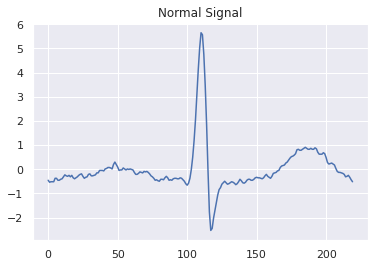

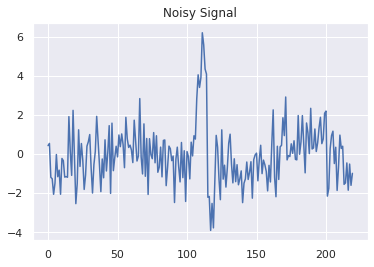

In [88]:
plt.plot(X_test[1])
plt.title('Normal Signal')
plt.show()
plt.plot(noise_test[1])
plt.title('Noisy Signal')
plt.show()

In [89]:
X_train1 = X_train.reshape(X_train.shape + (1,1))
X_test1 = noise_test.reshape(noise_test.shape + (1,1))

y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [90]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 64
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=16,padding='same', activation='relu',input_shape=(X_train1.shape[1],1)))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=32, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=9, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2,padding='same'))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(512, activation='relu'))
    cnnmodel.add(Dense(128, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 220, 128)          2176      
_________________________________________________________________
batch_normalization_10 (Batc (None, 220, 128)          512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 220, 32)           65568     
_________________________________________________________________
batch_normalization_11 (Batc (None, 220, 32)           128       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 220, 9)            4617      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 990)              

In [91]:
modelhistory= cnnmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Train on 25529 samples, validate on 6383 samples
Epoch 1/5
25216/25529 [============================>.] - ETA: 0s - loss: 0.3540 - accuracy: 0.8854

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


25529/25529 [==============================] - 4s 150us/sample - loss: 0.3513 - accuracy: 0.8862 - val_loss: 0.4729 - val_accuracy: 0.8501
Epoch 2/5
25529/25529 [==============================] - 3s 113us/sample - loss: 0.1241 - accuracy: 0.9606 - val_loss: 0.1781 - val_accuracy: 0.9417
Epoch 3/5
25529/25529 [==============================] - 3s 113us/sample - loss: 0.0838 - accuracy: 0.9725 - val_loss: 0.1011 - val_accuracy: 0.9679
Epoch 4/5
25529/25529 [==============================] - 3s 112us/sample - loss: 0.0642 - accuracy: 0.9785 - val_loss: 0.0953 - val_accuracy: 0.9724
Epoch 5/5
25529/25529 [==============================] - 3s 114us/sample - loss: 0.0592 - accuracy: 0.9801 - val_loss: 0.0858 - val_accuracy: 0.9773


In [92]:
cnnpredictions = cnnmodel.predict(X_test1[:,:,:,0], verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [93]:
from sklearn import metrics
cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(y_test1,axis=1)
cnnmetrics = metrics.classification_report(cnn_actual_value, cnn_predict, digits=3)
print(cnnmetrics, 'CNN metrics')

              precision    recall  f1-score   support

           1      0.910     0.781     0.840     28703
           2      0.994     0.100     0.182      1660
           3      0.851     0.509     0.637      2500
           4      0.364     0.478     0.413      1199
           5      0.092     0.582     0.158       773
           6      0.121     0.088     0.102       193
           7      0.088     0.699     0.156       428
           8      0.979     0.622     0.761      2407

    accuracy                          0.705     37863
   macro avg      0.550     0.482     0.406     37863
weighted avg      0.867     0.705     0.754     37863
 CNN metrics


In [94]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 256
activationFunction='relu'

def getlstmModel():
    
    lstmmodel = Sequential()
    lstmmodel.add(LSTM(128, return_sequences=True, input_shape=(X_train1.shape[1],1)))
    lstmmodel.add(LSTM(9, return_sequences=True))
    lstmmodel.add(MaxPooling1D(pool_size=2))
    lstmmodel.add(Flatten())
    lstmmodel.add(Dense(512, activation=tf.nn.relu))    
    lstmmodel.add(Dense(128, activation=tf.nn.relu))    
    lstmmodel.add(Dense(32, activation=tf.nn.relu))
    lstmmodel.add(Dense(9, activation='softmax'))
    lstmmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    lstmmodel.summary()
    return lstmmodel

lstmmodel = getlstmModel()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 220, 128)          66560     
_________________________________________________________________
lstm_7 (LSTM)                (None, 220, 9)            4968      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 990)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               507392    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_38 (Dense)             (None, 32)               

In [95]:
lstmmodelhistory= lstmmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Train on 25529 samples, validate on 6383 samples
Epoch 1/5
25529/25529 [==============================] - ETA: 0s - loss: 0.5827 - accuracy: 0.8122

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


25529/25529 [==============================] - 37s 1ms/sample - loss: 0.5827 - accuracy: 0.8122 - val_loss: 0.2120 - val_accuracy: 0.9298
Epoch 2/5
25529/25529 [==============================] - 37s 1ms/sample - loss: 0.1734 - accuracy: 0.9463 - val_loss: 0.1451 - val_accuracy: 0.9536
Epoch 3/5
25529/25529 [==============================] - 36s 1ms/sample - loss: 0.1084 - accuracy: 0.9658 - val_loss: 0.1477 - val_accuracy: 0.9524
Epoch 4/5
25529/25529 [==============================] - 38s 2ms/sample - loss: 0.0866 - accuracy: 0.9724 - val_loss: 0.1278 - val_accuracy: 0.9588
Epoch 5/5
25529/25529 [==============================] - 38s 2ms/sample - loss: 0.0643 - accuracy: 0.9789 - val_loss: 0.0865 - val_accuracy: 0.9742


In [96]:
lstmpredictions = lstmmodel.predict(X_test1[:,:,:,0], verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [97]:
lstm_predict=np.argmax(lstmpredictions,axis=1)
lstm_actual_value=np.argmax(y_test1,axis=1)
lstmmetrics = metrics.classification_report(lstm_actual_value, lstm_predict, digits=3)
print(lstmmetrics, 'lstm metrics')

              precision    recall  f1-score   support

           1      0.960     0.703     0.811     28703
           2      0.900     0.407     0.561      1660
           3      0.803     0.519     0.631      2500
           4      0.247     0.833     0.381      1199
           5      0.100     0.744     0.176       773
           6      0.090     0.580     0.156       193
           7      0.189     0.614     0.289       428
           8      0.973     0.822     0.891      2407

    accuracy                          0.689     37863
   macro avg      0.533     0.653     0.487     37863
weighted avg      0.894     0.689     0.758     37863
 lstm metrics
